In [1]:
# !pip install pyserial

In [2]:
import serial
import matplotlib.pyplot as plt
import serial.tools.list_ports as list_ports
from IPython.display import clear_output
import time
import math

import pandas as pd

# import plotext as plt
from ast import literal_eval as make_tuple

PID_MICROBIT = 516
VID_MICROBIT = 3368
TIMEOUT = 0.1

In [3]:
def find_comport(pid, vid, baud):
    ''' return a serial port '''
    ser_port = serial.Serial(timeout=TIMEOUT)
    ser_port.baudrate = baud
    ports = list(list_ports.comports())
    print('scanning ports')
    for p in ports:
        print('port: {}'.format(p))
        try:
            print('pid: {} vid: {}'.format(p.pid, p.vid))
        except AttributeError:
            continue
        if (p.pid == pid) and (p.vid == vid):
            print('found target device pid: {} vid: {} port: {}'.format(
                p.pid, p.vid, p.device))
            ser_port.port = str(p.device)
            return ser_port
    return None

In [4]:
def matplot():
    clear_output(wait=True)
    fig = plt.figure(figsize=[20,15])
    ax = fig.add_subplot(111)
#     line1, = plt.plot(x, label="x")
#     line1, = plt.plot(y, label="y")
#     line1, = plt.plot(z, label="z")
#     line1, = plt.plot(a, label="acceleration")
#     line1, = plt.plot(ma20, label="ma20")
#     line1, = plt.plot(ma100, label="ma100")
#     line1, = plt.plot(ma250, label="ma250")
    line1, = plt.plot(diffma, label="difference absolute")
    line1, = plt.plot(avgA, label="average 20")
    line1, = plt.plot(avgA300, label="average 300")
#     line1, = plt.plot(ma500, label="ma500")
    ax.legend()
    plt.show(block=False)

In [5]:
def clear_graph():
    x.clear()
    y.clear()
    z.clear()
    a.clear()
    ma20.clear()
    ma250.clear()
    diffma.clear()
    avgA.clear()
    avgA300.clear()
    reset_arr()
    
def reset_arr():
    ma20 = [1000 for i in range(19)]
    ma250 = [1000 for i in range(249)]
    diffma = [1000 for i in range(249)]
    avgA = [1000 for i in range(249)]
    avgA300 = [0 for i in range(299)]

In [6]:
def main():
    print('looking for microbit')
    ser_micro = find_comport(PID_MICROBIT, VID_MICROBIT, 115200)
    if not ser_micro:
        print('microbit not found')
        return
    print('opening and monitoring microbit port')
    ser_micro.open()
    count = 0
    while True:
        line = ser_micro.readline().decode('utf-8')
#         clear_output(wait=True)
#         print(line)
#         continue
        if "C" in line:
            break
        if "B" in line:
            clear_graph()
        line = line.split(" A")[0]
        try:
            acc = make_tuple(line)
            ax = int(acc[0])
            ay = int(acc[1])
            az = int(acc[2])
            x.append(ax)
            y.append(ay)
            z.append(az)
            total_acc = math.sqrt(ax**2 + ay**2 + az**2)
            a.append(total_acc)
            if len(a) >= 20:
                d20 = sum(a[len(a)-20:])/20
                ma20.append(d20)
#             if len(a) >= 50:
#                 ma50.append(sum(a[len(a)-50:])/50)
#             if len(a) >= 100:
#                 ma100.append(sum(a[len(a)-100:])/100)
            
            if len(a) >= 250:
                d250 = sum(a[len(a)-250:])/250
                ma250.append(d250)
                d2f250 = abs(d250-d20)
                diffma.append(d2f250)
                avgA.append(sum(diffma[len(diffma)-20:])/20)
#                 print(sum(diffma[len(diffma)-20:])/20)
                
            if len(a) >= 300:
                avgA300.append(sum(diffma[len(diffma)-300:])/300)
#                 ma500.append(sum(a[len(a)-500:])/500)
                
            if count % 100 == 0:
                matplot()
            count+=1
#         if line:  # If it isn't a blank line
#             line = line.split("|")
# #             print(line)
#             if len(line) < 3:
#                 continue
#             try:
#                 x.append(int(line[0]))
#                 y.append(int(line[1]))
#                 z.append(int(line[2]))
#                 matplot()
        except Exception as e: 
            print(e)
#             break

    ser_micro.close()

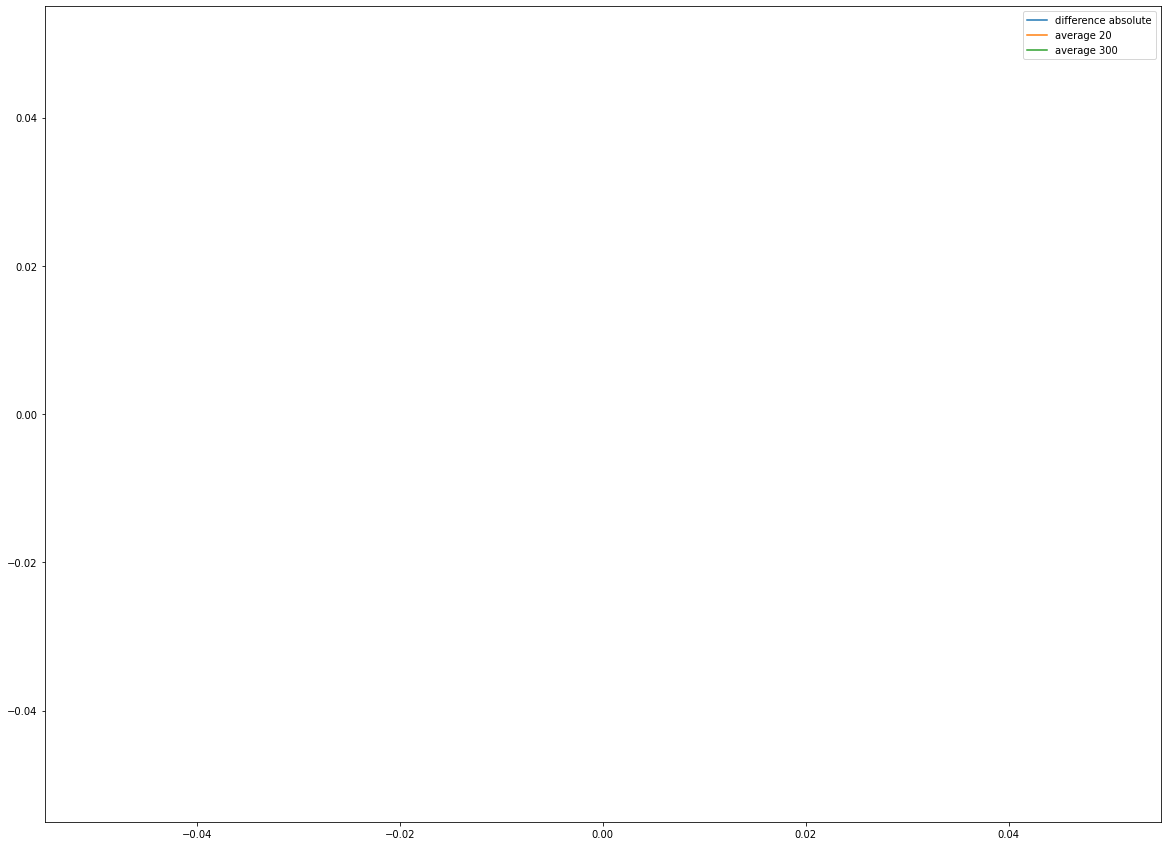

In [7]:
x = []
y = []
z = []
a = []
ma20 = [1000 for i in range(19)]
# ma50 = [1000 for i in range(49)]
# ma100 = [1000 for i in range(99)]
ma250 = [1000 for i in range(249)]
diffma = [0 for i in range(249)]
avgA = [0 for i in range(249)]
avgA300 = [0 for i in range(299)]
# ma500 = [1000 for i in range(499)]
main()

In [8]:
# d = {"a" : avgA300}
# df = pd.DataFrame(d)
# df.to_csv("a300.csv")

In [9]:
# di = {
#     "x" : x,
#     "y" : y,
#     "z" : z,
#     "acceleration" : a,
#     "ma20" : ma20,
#     "ma250" : ma250
# #     "ma500" : ma500
# }

# df = pd.DataFrame(di)

In [10]:
# df.to_csv("stand-walk-log.csv")